<a href="https://colab.research.google.com/github/eduardogil11/IA-Modulo-1-Estadistica/blob/main/Workshop_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Workshop 3, Advanced AI - Statistics Module

Eduardo Rodríguez Gil - A01274913

## 3.1 CHALLENGE - IS AMD MEAN RETURN HIGHER THAN INTEL MEAN RETURN?

Do a t-test to check whether the mean monthly cc return of AMD (AMD) is greater than the mean monthly return of Intel. Use data from Jan 2017 to date.

In [1]:
from pandas_datareader import data as pdr
import pandas as pd
import numpy as np

# Getting price data and selecting adjusted price columns:
sprices = pdr.get_data_yahoo(['AMD','INTC'],start="01/01/2017", end="08/15/2022",interval="m")
sprices=sprices['Adj Close']

In [2]:
# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()

In [3]:
# Stating the hypotheses: 
# H0: (mean(rAMD) - mean(rINTEL)) = 0
# Ha: (mean(rAMD) - mean(rINTEL)) <> 0

# Calculating the standard error of the difference of the means:
N = sr['AMD'].count()
amdvar = sr['AMD'].var()
intelvar = sr['INTC'].var()
sediff = np.sqrt((1/N) * (amdvar + intelvar ) )

# Calculating the t-Statistic:
t = (sr['AMD'].mean() - sr['INTC'].mean()) / sediff
t

1.4514397488995976

In [4]:
# Calculating the pvalue from the t-Statistic:
from scipy import stats as st
# The st.t.sf function calculates the 1-tailed pvalue, so we multiply it by 2 to get the 2-tailed pvalue
# the degrees of freedom for 2-independent-means t-test is calculated with the following formula:
df = ( ((N-1) / N**2) * (amdvar + intelvar)**2  / ( (amdvar/N)**2 + (intelvar/N)**2  ) )
# Now we calculate the pvalue with the t and df:
pvalue = 2 * st.t.sf(np.abs(t), df)
pvalue

0.15001774681136115

In [5]:
# Using the ttest_ind function from stats:
st.ttest_ind(sr['AMD'],sr['INTC'],equal_var=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

Ttest_indResult(statistic=1.4514397488995976, pvalue=0.15001774681136115)

In [7]:
!pip install researchpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
import researchpy as rp
# Using the ttest function from researchpy:
rp.ttest(sr['AMD'],sr['INTC'],equal_variances=False)
# We got the same result as above!
# With this function we avoid calculating all steps of the hypothesis test!

(   Variable      N      Mean        SD        SE  95% Conf.  Interval
 0       AMD   67.0  0.033208  0.162019  0.019794  -0.006312  0.072727
 1      INTC   67.0  0.001539  0.075133  0.009179  -0.016787  0.019866
 2  combined  134.0  0.017373  0.126808  0.010955  -0.004294  0.039041,
                Welch's t-test  results
 0  Difference (AMD - INTC) =    0.0317
 1       Degrees of freedom =   93.9534
 2                        t =    1.4514
 3    Two side test p value =    0.1500
 4   Difference < 0 p value =    0.9250
 5   Difference > 0 p value =    0.0750
 6                Cohen's d =    0.2508
 7                Hedge's g =    0.2493
 8            Glass's delta =    0.1955
 9              Pearson's r =    0.1481)

## 4 Measures of linear relationship

Let’s download the price data and do the corresponding return calculation. Instead of pandas, we will use yfinance to download online data from Yahoo Finance.

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt

# We download price data for Microsoft and the S&P500 index:
prices=yf.download(tickers="MSFT ^GSPC", start="2019-01-01",interval="1mo")
# We select Adjusted closing prices and drop any row with NA values:
adjprices = prices['Adj Close'].dropna()

[*********************100%***********************]  2 of 2 completed


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


Unfortunately, the range of stock prices and market indexes can vary a lot, so this makes difficult to compare price movements in one plot. For example, if we plot the MSFT prices and the S&P500:

<Figure size 432x288 with 0 Axes>

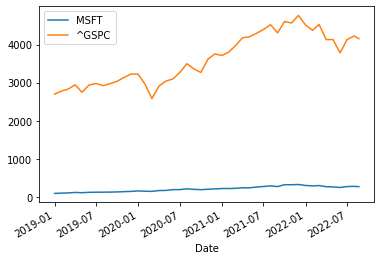

In [ ]:
plt.clf()
adjprices.plot(y=['MSFT','^GSPC'])
plt.show()

When comparing the performance of 2 or more stock prices and/or indexes, it is a good idea to generate an index for each series, so that we can emulate how much $1.00 invested in each stock/index would have moved over time. We can divide the stock price of any month by the stock price of the first month to get a growth factor:

In [ ]:
adjprices['iMSFT'] = adjprices['MSFT'] / adjprices['MSFT'][0]
adjprices['iGSPC'] = adjprices['^GSPC'] / adjprices['^GSPC'][0]

This growth factor is like an index of the original variable. Now we can plot these 2 new indexes over time and see which investment was better:

<Figure size 432x288 with 0 Axes>

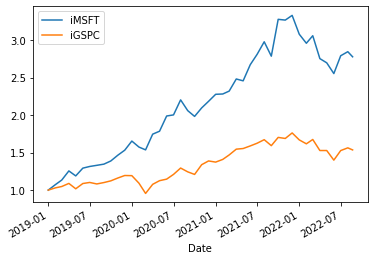

In [ ]:
plt.clf()
adjprices.plot(y=['iMSFT','iGSPC'])
plt.show()

Now we calculate continuously compounded monthly returns. With pandas most of the data management functions works row-wise. In other words, operations are performed to all columns by row:

In [ ]:
r = np.log(adjprices) - np.log(adjprices.shift(1))
# Dropping rows with NA values (the first month will have NAs)
r = r.dropna()
# Selecting only 2 columns (out of the 4 columns):
r = r[['MSFT','^GSPC']]
# Renameing the column names:
r.columns = ['MSFT','GSPC']

Now the r dataframe will have 2 columns for both cc historical returns:

In [ ]:
r.head()

,MSFT,GSPC
Date,,
2019-02-01,0.070250,0.029296
2019-03-01,0.055671,0.017766
2019-04-01,0.101963,0.038560
2019-05-01,-0.054442,-0.068041
2019-06-01,0.083539,0.066658


We start with a scatter plot to see whether there is a linear relationship between the MSFT prices and the GSPC index:

<Figure size 432x288 with 0 Axes>

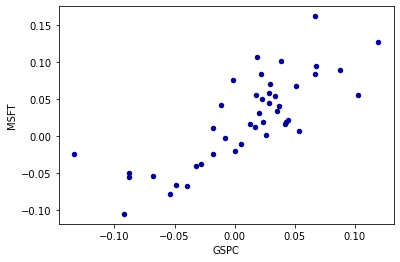

In [ ]:
plt.clf()
r.plot.scatter(x='GSPC', y='MSFT',c='DarkBlue')
plt.show()

We can also do a scatter plot to visualize the relationship between the MSFT returns and GSPC returns:

<Figure size 432x288 with 0 Axes>

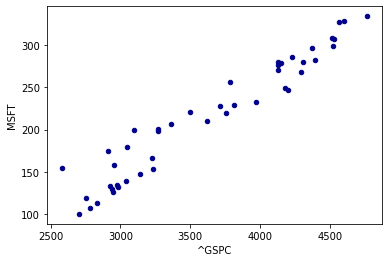

In [ ]:
plt.clf()
adjprices.plot.scatter(x='^GSPC', y='MSFT',c='DarkBlue')
plt.show()

Stock returns are variables that usually does NOT grow over time; they look like a plot of heart bits:

<Figure size 432x288 with 0 Axes>

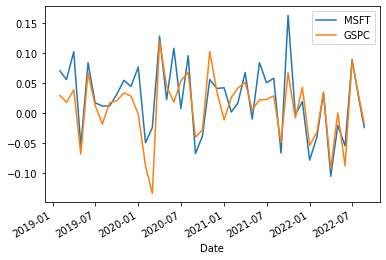

In [ ]:
plt.clf()
r.plot(y=['MSFT','GSPC'])
plt.show()

## 4.3 Calculating covariance and correlation

In [ ]:
msft_mean = r['MSFT'].mean()
gspc_mean = r['GSPC'].mean()
N = r['GSPC'].count()
sum_of_prod = ((r['MSFT'] - msft_mean) * (r['GSPC'] - gspc_mean) ).sum()  
cov = sum_of_prod / (N-1)
cov

0.002480643923060742

Fortunately, we have the numpy function cov to calculate the covariance:

In [ ]:
covm = np.cov(r['MSFT'],r['GSPC'])
covm

array([[0.00351725, 0.00248064],
       [0.00248064, 0.00278901]])

Then, to extract the covariance between MSFT and GSPC returns we can extract the element in the row 1 and column 2 of the matrix:

In [ ]:
cov = covm[0,1]
cov

0.002480643923060742

We can use the corrcoef function of numpy to calculate the correlation matrix:

In [ ]:
corr = np.corrcoef(r['MSFT'],r['GSPC'])
corr

array([[1.        , 0.79202302],
       [0.79202302, 1.        ]])

We could also manually calculate correlation using the previous covariance:

In [ ]:
corr2 = cov / (r['MSFT'].std() * r['GSPC'].std())
corr2

0.7920230174492813

We can use the scipy pearsonr function to calculate correlation and also the 2-tailed pvalue to see whether the correlation is statistically different than zero:

In [ ]:
from scipy.stats import pearsonr
corr2 = pearsonr(r['MSFT'],r['GSPC'])
corr2

(0.7920230174492812, 1.5199931413164502e-10)